<a href="https://colab.research.google.com/github/sammetakushal159/Text-Classification/blob/main/IMDB_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from keras.backend import concatenate
from keras import Sequential
from keras import layers
from keras import models
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,AveragePooling1D
from keras.layers import Conv2DTranspose,UpSampling2D,Dropout
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import Conv1DTranspose,UpSampling1D

In [ ]:
imdb = keras.datasets.imdb
vocabulary = imdb.get_word_index()
num_words = 16*16*16
(X_train, Y_train), (X_test,Y_test) = imdb.load_data(seed=1, num_words=num_words)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=num_words)

X_test = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=0,
                                                       padding='post',
                                                       maxlen=num_words)

In [ ]:
X_train[0].shape

(4096,)

In [ ]:
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,test_size=0.5)

In [ ]:
print(X_train.shape,Y_train.shape)

(25000, 4096) (25000,)


In [ ]:
model = keras.Sequential()

model.add(keras.layers.Embedding(len(vocabulary), 3, input_length=num_words))

model.add(keras.layers.Conv1D(filters=32, kernel_size=(5) ,activation='relu'))
#model.add(keras.layers.Conv1D(filters=32, kernel_size=(3) ,activation='relu'))
model.add(keras.layers.Conv1D(filters=32, kernel_size=(3) ,activation='relu'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dropout(rate=0.5))

# model.add(keras.layers.Dense(10000))
# model.add(keras.layers.Dense(100))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4096, 3)           265752    
                                                                 
 conv1d (Conv1D)             (None, 4092, 32)          512       
                                                                 
 conv1d_1 (Conv1D)           (None, 4090, 32)          3104      
                                                                 
 flatten (Flatten)           (None, 130880)            0         
                                                                 
 dropout (Dropout)           (None, 130880)            0         
                                                                 
 dense (Dense)               (None, 1)                 130881    
                                                                 
Total params: 400,249
Trainable params: 400,249
Non-trai

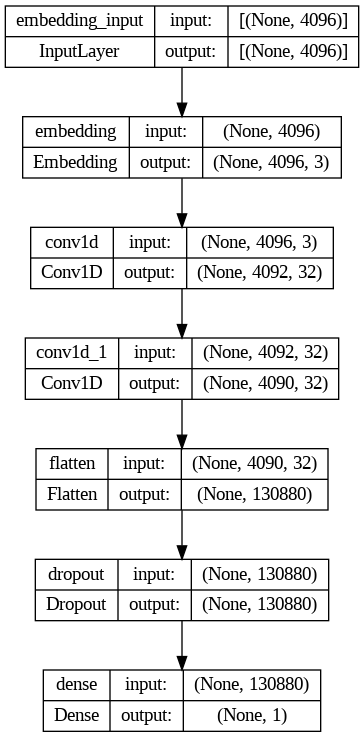

In [ ]:
tf.keras.utils.plot_model(model, to_file="model_representation.png", show_shapes=True)

In [ ]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:
history = model.fit(X_train,Y_train,batch_size=2, epochs=10,validation_data=(X_val,Y_val))

Epoch 1/10
12500/12500 [==============================] - 184s 14ms/step - loss: 0.3953 - accuracy: 0.8054 - precision: 0.7807 - recall: 0.8494 - val_loss: 0.2870 - val_accuracy: 0.8795 - val_precision: 0.9200 - val_recall: 0.8336
Epoch 2/10
12500/12500 [==============================] - 83s 7ms/step - loss: 0.2476 - accuracy: 0.9017 - precision: 0.8996 - recall: 0.9043 - val_loss: 0.2661 - val_accuracy: 0.8940 - val_precision: 0.8951 - val_recall: 0.8947
Epoch 3/10
12500/12500 [==============================] - 83s 7ms/step - loss: 0.2072 - accuracy: 0.9219 - precision: 0.9212 - recall: 0.9227 - val_loss: 0.2796 - val_accuracy: 0.8914 - val_precision: 0.8877 - val_recall: 0.8981
Epoch 4/10
12500/12500 [==============================] - 83s 7ms/step - loss: 0.1787 - accuracy: 0.9332 - precision: 0.9318 - recall: 0.9349 - val_loss: 0.3084 - val_accuracy: 0.8886 - val_precision: 0.8983 - val_recall: 0.8785
Epoch 5/10
12500/12500 [==============================] - 74s 6ms/step - loss: 0.1

In [ ]:
y_predicted = model.predict(X_test)

391/391 [==============================] - 2s 3ms/step


In [ ]:
y_predicted = y_predicted.flatten()

In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)

In [ ]:
y_predicted

array([1, 1, 0, ..., 1, 1, 0])

Text(50.722222222222214, 0.5, 'Truth')

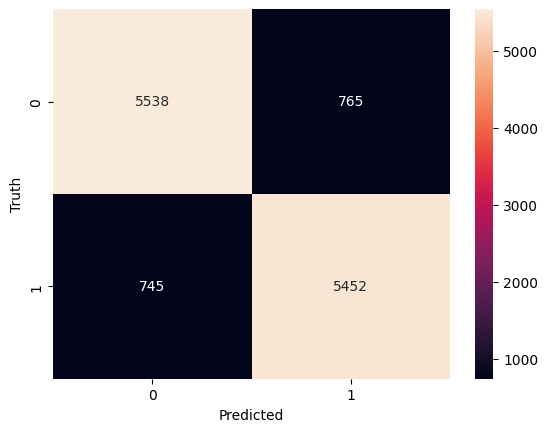

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn

cm = confusion_matrix(Y_test, y_predicted)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')